In [26]:
library(tidyverse) 
library(tidymodels)

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Dig deeper into tidy modeling with R at https://www.tmwr.org



## LEGEND:

1. age = age
2. sex = sex (1/0)
3. cp = chest pain (4 classifications)
4. trestbps = resting blood pressure (mm Hg)
5. chol = serum cholestrol (mg/dl)
6. fbs = fasting blood sugar (1/0, yes/no)
7. restecg = resting electrocardiographic results  (3 classifications)
8. thalach = maximum heart rate achieved 
9. exang = exercise induced angina (1/0, yes/no)
10. oldpeak = ST depression induced by exercise relative to rest 
11. slope = slope of the peak exercise ST segment  (3 classifications)
12. ca = number of major vessels (0-3) colored by flourosopy 
13. hal = histidine ammonia-lyase (HAL) gene : 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. num = diagnosis of heart disease (angiographic disease status) (0/1) 	-- Value 0: < 50% diameter narrowing  	-- Value 1: > 50% diameter narrowing 


----

## 1) Data Reading and Tidying

In [19]:
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data"
hungarian_heart_disease_data <- read.csv(url, header = FALSE, na.strings = "?")
colnames(hungarian_heart_disease_data) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
mutate(hungarian_heart_disease_data, num = as_factor(num))
hungarian_heart_disease_data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<fct>
28,1,2,130,132,0,2,185,0,0,NA,NA,NA,0
29,1,2,120,243,0,0,160,0,0,NA,NA,NA,0
29,1,2,140,NA,0,0,170,0,0,NA,NA,NA,0
30,0,1,170,237,0,1,170,0,0,NA,NA,6,0
31,0,2,100,219,0,1,150,0,0,NA,NA,NA,0
32,0,2,105,198,0,0,165,0,0,NA,NA,NA,0
32,1,2,110,225,0,0,184,0,0,NA,NA,NA,0
32,1,2,125,254,0,0,155,0,0,NA,NA,NA,0
33,1,3,120,298,0,0,185,0,0,NA,NA,NA,0


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
28,1,2,130,132,0,2,185,0,0,NA,NA,NA,0
29,1,2,120,243,0,0,160,0,0,NA,NA,NA,0
29,1,2,140,NA,0,0,170,0,0,NA,NA,NA,0
30,0,1,170,237,0,1,170,0,0,NA,NA,6,0
31,0,2,100,219,0,1,150,0,0,NA,NA,NA,0
32,0,2,105,198,0,0,165,0,0,NA,NA,NA,0
32,1,2,110,225,0,0,184,0,0,NA,NA,NA,0
32,1,2,125,254,0,0,155,0,0,NA,NA,NA,0
33,1,3,120,298,0,0,185,0,0,NA,NA,NA,0


In [20]:
tidy_hungarian_heart_disease_data <- hungarian_heart_disease_data |>
    mutate(patient_id = row_number())
tidy_hungarian_heart_disease_data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,patient_id
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>
28,1,2,130,132,0,2,185,0,0,NA,NA,NA,0,1
29,1,2,120,243,0,0,160,0,0,NA,NA,NA,0,2
29,1,2,140,NA,0,0,170,0,0,NA,NA,NA,0,3
30,0,1,170,237,0,1,170,0,0,NA,NA,6,0,4
31,0,2,100,219,0,1,150,0,0,NA,NA,NA,0,5
32,0,2,105,198,0,0,165,0,0,NA,NA,NA,0,6
32,1,2,110,225,0,0,184,0,0,NA,NA,NA,0,7
32,1,2,125,254,0,0,155,0,0,NA,NA,NA,0,8
33,1,3,120,298,0,0,185,0,0,NA,NA,NA,0,9


In [24]:
heart_disease_data_scaled <- tidy_hungarian_heart_disease_data |> 
    select(age:thal) |>
    mutate_all(scale, center = TRUE) |>
    bind_cols(tidy_hungarian_heart_disease_data |> select(patient_id, num))
heart_disease_data_scaled

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,patient_id,num
"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",<int>,<int>
-2.538019,0.6156202,-1.0185225,-0.1465752,-1.75661733,-0.2737245,3.865688,1.9445017,-0.6593827,-0.6449742,NA,NA,NA,1,0
-2.410008,0.6156202,-1.0185225,-0.7139006,-0.11600612,-0.2737245,-0.473954,0.8847193,-0.6593827,-0.6449742,NA,NA,NA,2,0
-2.410008,0.6156202,-1.0185225,0.4207502,NA,-0.2737245,-0.473954,1.3086323,-0.6593827,-0.6449742,NA,NA,NA,3,0
-2.281997,-1.6188531,-2.0546666,2.1227265,-0.20468781,-0.2737245,1.695867,1.3086323,-0.6593827,-0.6449742,NA,NA,0.2211309,4,0
-2.153985,-1.6188531,-1.0185225,-1.8485515,-0.47073287,-0.2737245,1.695867,0.4608064,-0.6593827,-0.6449742,NA,NA,NA,5,0
-2.025974,-1.6188531,-1.0185225,-1.5648887,-0.78111877,-0.2737245,-0.473954,1.0966758,-0.6593827,-0.6449742,NA,NA,NA,6,0
-2.025974,0.6156202,-1.0185225,-1.2812260,-0.38205118,-0.2737245,-0.473954,1.9021104,-0.6593827,-0.6449742,NA,NA,NA,7,0
-2.025974,0.6156202,-1.0185225,-0.4302379,0.04657697,-0.2737245,-0.473954,0.6727629,-0.6593827,-0.6449742,NA,NA,NA,8,0
-1.897963,0.6156202,0.0176215,-0.7139006,0.69690935,-0.2737245,-0.473954,1.9445017,-0.6593827,-0.6449742,NA,NA,NA,9,0


---

## 2) Data Splitting into Train and Test Data Set

In [28]:
set.seed(1234)
heart_disease_split <- initial_split(heart_disease_data_scaled, prop = 0.75, strata = num)  
heart_disease_train <- training(heart_disease_split)   
heart_disease_test <- testing(heart_disease_split)
heart_disease_train
heart_disease_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,patient_id,num
,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",<int>,<int>
2,-2.410008,0.6156202,-1.0185225,-0.7139006,-0.11600612,-0.2737245,-0.473954,0.88471933,-0.6593827,-0.6449742,NA,NA,NA,2,0
3,-2.410008,0.6156202,-1.0185225,0.4207502,NA,-0.2737245,-0.473954,1.30863227,-0.6593827,-0.6449742,NA,NA,NA,3,0
4,-2.281997,-1.6188531,-2.0546666,2.1227265,-0.20468781,-0.2737245,1.695867,1.30863227,-0.6593827,-0.6449742,NA,NA,0.2211309,4,0
6,-2.025974,-1.6188531,-1.0185225,-1.5648887,-0.78111877,-0.2737245,-0.473954,1.09667580,-0.6593827,-0.6449742,NA,NA,NA,6,0
7,-2.025974,0.6156202,-1.0185225,-1.2812260,-0.38205118,-0.2737245,-0.473954,1.90211039,-0.6593827,-0.6449742,NA,NA,NA,7,0
8,-2.025974,0.6156202,-1.0185225,-0.4302379,0.04657697,-0.2737245,-0.473954,0.67276286,-0.6593827,-0.6449742,NA,NA,NA,8,0
9,-1.897963,0.6156202,0.0176215,-0.7139006,0.69690935,-0.2737245,-0.473954,1.94450168,-0.6593827,-0.6449742,NA,NA,NA,9,0
10,-1.769952,-1.6188531,-1.0185225,-0.1465752,-1.32798918,-0.2737245,-0.473954,2.15645815,-0.6593827,-0.6449742,NA,NA,NA,10,0
11,-1.769952,0.6156202,-1.0185225,0.9880756,-0.54463427,-0.2737245,1.695867,1.22384968,-0.6593827,-0.6449742,NA,NA,NA,11,0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,patient_id,num
,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",<int>,<int>
1,-2.53801929,0.6156202,-1.0185225,-0.1465752,-1.75661733,-0.2737245,3.865688,1.94450168,-0.6593827,-0.6449742,NA,NA,NA,1,0
5,-2.15398549,-1.6188531,-1.0185225,-1.8485515,-0.47073287,-0.2737245,1.695867,0.46080639,-0.6593827,-0.6449742,NA,NA,NA,5,0
12,-1.76995169,0.6156202,-1.0185225,-1.9620165,-0.45595259,-0.2737245,-0.473954,0.46080639,-0.6593827,-0.6449742,NA,NA,NA,12,0
13,-1.64194043,-1.6188531,-2.0546666,-0.7139006,-1.34276946,-0.2737245,1.695867,1.94450168,-0.6593827,-0.6449742,NA,NA,NA,13,0
18,-1.51392916,0.6156202,0.0176215,-1.1677610,1.31768116,-0.2737245,-0.473954,1.90211039,-0.6593827,0.4555621,0.3120079,NA,-1.636369,18,0
24,-1.38591789,0.6156202,-1.0185225,-0.1465752,0.47520513,-0.2737245,1.695867,-1.74354090,-0.6593827,-0.6449742,NA,NA,NA,24,0
31,-1.12989536,-1.6188531,0.0176215,-1.2812260,-1.01760327,-0.2737245,1.695867,1.73254521,-0.6593827,-0.6449742,NA,NA,NA,31,0
33,-1.12989536,0.6156202,-1.0185225,-0.7139006,-0.75155821,-0.2737245,-0.473954,0.88471933,1.5113940,0.4555621,0.3120079,NA,NA,33,0
34,-1.12989536,0.6156202,-1.0185225,-0.7139006,-0.69243709,-0.2737245,-0.473954,0.24884992,-0.6593827,-0.6449742,NA,NA,NA,34,0


In [31]:
train_summary <- heart_disease_train |>
    group_by(num) |>
    summarize(num_obs = n(),
              age_mean = mean(age, na.rm = TRUE),
              thalach_mean = mean(thalach, na.rm = TRUE),
              chol_mean = mean(chol, na.rm = TRUE),
              restecg_0 = sum(restecg == 0, na.rm = TRUE),
              restecg_1 = sum(restecg == 1, na.rm = TRUE),
              restecg_2 = sum(restecg == 2, na.rm = TRUE),
              cp_1 = sum(cp == 1, na.rm = TRUE),
              cp_2 = sum(cp == 2, na.rm = TRUE),
              cp_3 = sum(cp == 3, na.rm = TRUE),
              cp_4 = sum(cp == 4, na.rm = TRUE),
              missing_data = sum(is.na(heart_disease_train)))
train_summary

num,num_obs,age_mean,thalach_mean,chol_mean,restecg_0,restecg_1,restecg_2,cp_1,cp_2,cp_3,cp_4,missing_data
<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,141,-0.07947667,0.2116061,-0.07547582,0,0,0,0,0,0,0,589
1,79,0.15345809,-0.4567773,0.39071785,0,0,0,0,0,0,0,589


----

## 3) Distribution of Predictor Variables

Warning message:
“Removed 19 rows containing non-finite values (stat_boxplot).”


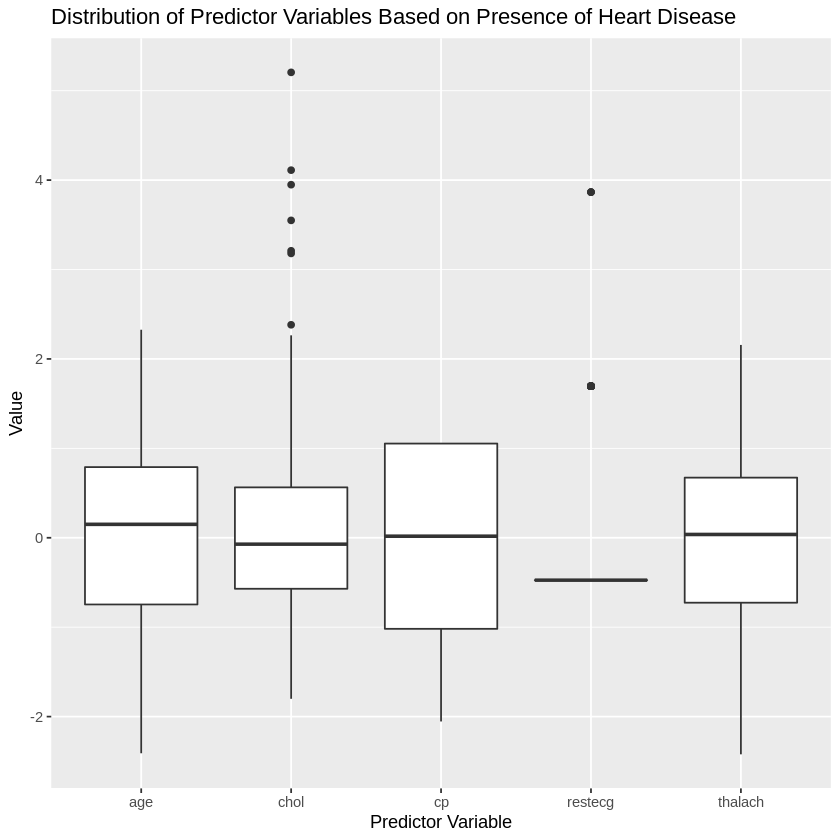

In [33]:
heart_disease_plot <- heart_disease_train |>
    select(age, thalach, chol, restecg, cp, num) |>
    pivot_longer(cols = c(age, thalach, chol, restecg, cp), names_to = "variable", values_to = "value") |>
    ggplot(aes(x = variable, y = value)) +
    geom_boxplot() +
    labs(x = "Predictor Variable", y = "Value", title = "Distribution of Predictor Variables Based on Presence of Heart Disease")

heart_disease_plot